In [1]:
# Check python version
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

## Libraries

We include:

* tensorflow: for building and training networks
* numpy: for linear algebra and matrix/vector storage
* matplotlib: for data visualization

In [2]:
# Include libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

## Data Import

Let's import the MNIST data within the tensorflow.

In [3]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

#  
train_features = mnist.train.images
valid_features = mnist.validation.images
test_features = mnist.test.images

train_labels = mnist.train.labels.astype(np.float32)
valid_labels = mnist.validation.labels.astype(np.float32)
test_labels = mnist.test.labels.astype(np.float32)
del mnist

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Analyze the Data

In [4]:
# number of testing and training samples
n_train = len(train_features)
n_valid = len(valid_features)
n_test = len(test_features)
print("Training size: ", n_train)
print("Validation size: ", n_valid)
print("Test size: ", n_test)

# What's the shape of an image?
image_shape = train_features[0].shape
n_features = image_shape[0]

# How many unique classes/labels there are in the dataset?
n_classes = len(np.unique(train_labels, axis=0))

print("Image data shape =", image_shape)
print("Number of features =", n_features)
print("Number of classes =", n_classes)

Training size:  55000
Validation size:  5000
Test size:  10000
Image data shape = (784,)
Number of features = 784
Number of classes = 10


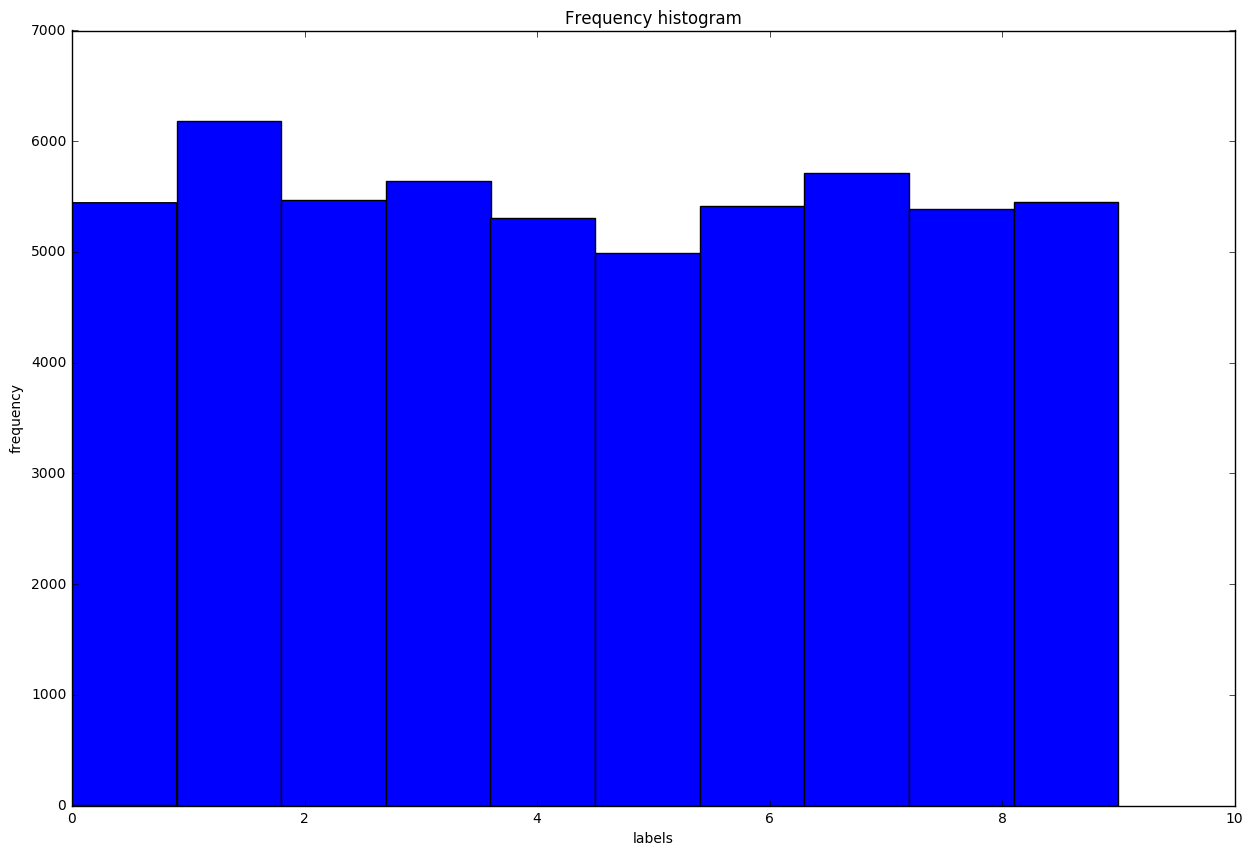

In [5]:
# histogram for labels
plt.figure(figsize=(15,10))
decoding = tf.argmax(train_labels, axis=1)
# ...
with tf.Session() as sess:
    decoded_train_labels = sess.run(decoding)
    
plt.hist(decoded_train_labels, bins=n_classes, histtype='bar', align='mid', orientation='vertical')
plt.title("Frequency histogram")
plt.xlabel("labels")
plt.ylabel("frequency")
plt.show()

## Visualize Data Sample

Visualize a random input and its label.

Label of the image:  [1]


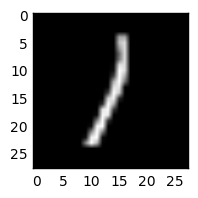

In [6]:
import random
index = random.randint(0, len(train_features))
image = np.reshape(train_features[index],(28,28))

#select a random image from the training set and visualize it
plt.figure(figsize=(2,2))
plt.imshow(image, cmap='gray')
sample_label = np.where(train_labels[index] == 1)[0] # label of the image
print("Label of the image: ", sample_label)

In [7]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, n_features]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, n_classes]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.random_normal([n_features, n_classes]))
b = tf.Variable(tf.random_normal([n_classes]))

# Construct model
logits = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
learning_rate = tf.placeholder(tf.float32)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(logits), reduction_indices=1))

# Use an SGD method to optimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Hyperparameters

We need to set the hyperparameters which are:

* learning rate, 
* number of batches, 
* number of epochs.

In [25]:
learn_rate = 0.01
epochs = 100
batch_size = 128

## Training

Now, it is time to optimize our weights and biases to obtain the best model to predict hand written digits.

In [26]:
# For saving the model
saver = tf.train.Saver()
# Start training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Training cycle
    for epoch in range(epochs):
        avg_cost = 0.
        total_batch = int(n_train/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x = train_features[i*batch_size:(i+1)*batch_size]
            batch_y = train_labels[i*batch_size:(i+1)*batch_size]
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, 
                                                          y: batch_y, 
                                                          learning_rate: learn_rate})
            # Compute average loss
            avg_cost += c / total_batch
        
        # Display logs per epoch step
        print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print ("Training Completed!")
    saver.save(sess, './linear')
    print("Model saved")

Epoch: 0001 cost= 8.874447811
Epoch: 0002 cost= 5.233251438
Epoch: 0003 cost= 3.761282817
Epoch: 0004 cost= 2.985743991
Epoch: 0005 cost= 2.517162576
Epoch: 0006 cost= 2.203745642
Epoch: 0007 cost= 1.979173143
Epoch: 0008 cost= 1.810085990
Epoch: 0009 cost= 1.677847310
Epoch: 0010 cost= 1.571429105
Epoch: 0011 cost= 1.483909053
Epoch: 0012 cost= 1.410625784
Epoch: 0013 cost= 1.348296610
Epoch: 0014 cost= 1.294552891
Epoch: 0015 cost= 1.247652955
Epoch: 0016 cost= 1.206295990
Epoch: 0017 cost= 1.169494245
Epoch: 0018 cost= 1.136486218
Epoch: 0019 cost= 1.106675955
Epoch: 0020 cost= 1.079589959
Epoch: 0021 cost= 1.054845613
Epoch: 0022 cost= 1.032129101
Epoch: 0023 cost= 1.011180140
Epoch: 0024 cost= 0.991781536
Epoch: 0025 cost= 0.973750778
Epoch: 0026 cost= 0.956933682
Epoch: 0027 cost= 0.941199252
Epoch: 0028 cost= 0.926435531
Epoch: 0029 cost= 0.912546084
Epoch: 0030 cost= 0.899447480
Epoch: 0031 cost= 0.887067073
Epoch: 0032 cost= 0.875341194
Epoch: 0033 cost= 0.864213885
Epoch: 003

In [27]:
# Test model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))

# Calculate accuracy for 3000 examples
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print ("Accuracy:", accuracy.eval({x: test_features[:3000], y: test_labels[:3000]}))

Accuracy: 0.8340001
